<a href="https://colab.research.google.com/github/shahriarshajib5/Kazi_DataAnalysis/blob/main/Federal_Reserve_Economic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fredapi > /dev/null  # to suppress any installation messages.




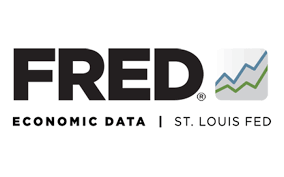

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fredapi import Fred
fred_key = 'ec67996712eb023b6795987323676cbf'



In [3]:
fred = Fred(api_key= fred_key) # creating Fred object to pull data from the Fred website

In [4]:
sp_search = fred.search('S&P', order_by= 'popularity') #search for economic data
print(sp_search.shape)
sp_search.head()

(1000, 15)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-22,2023-11-22,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-21 08:49:01-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-22,2023-11-22,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2023-11-22,2023-11-22,S&P 500,2013-11-22,2023-11-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-21 19:11:00-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-22,2023-11-22,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-21 08:49:08-06:00,83,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-11-22,2023-11-22,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


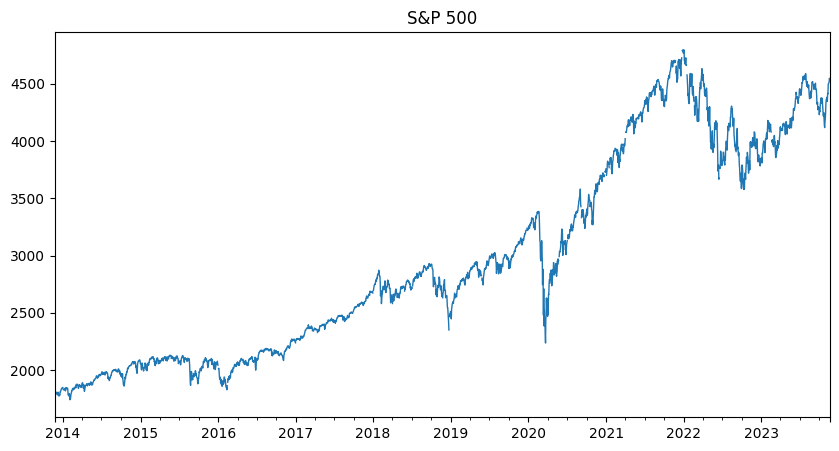

In [5]:
sp500 = fred.get_series(series_id='SP500') #pulling raw data
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 1)

fig = px.line(sp500)
fig.show()

In [6]:
unemp_results = fred.search('unemployement', order_by = 'popularity')
unemp_results.shape
unemp_results.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-22,2023-11-22,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
CPIAUCSL,CPIAUCSL,2023-11-22,2023-11-22,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-10-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-11-14 07:52:02-06:00,94,The Consumer Price Index for All Urban Consume...
PAYEMS,PAYEMS,2023-11-22,2023-11-22,"All Employees, Total Nonfarm",1939-01-01,2023-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-11-03 07:52:02-05:00,82,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2023-11-22,2023-11-22,Initial Claims,1967-01-07,2023-11-11,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-11-16 07:34:02-06:00,81,An initial claim is a claim filed by an unempl...
SAHMREALTIME,SAHMREALTIME,2023-11-22,2023-11-22,Real-time Sahm Rule Recession Indicator,1959-12-01,2023-10-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2023-11-14 09:40:01-06:00,81,Sahm Recession Indicator signals the start of ...


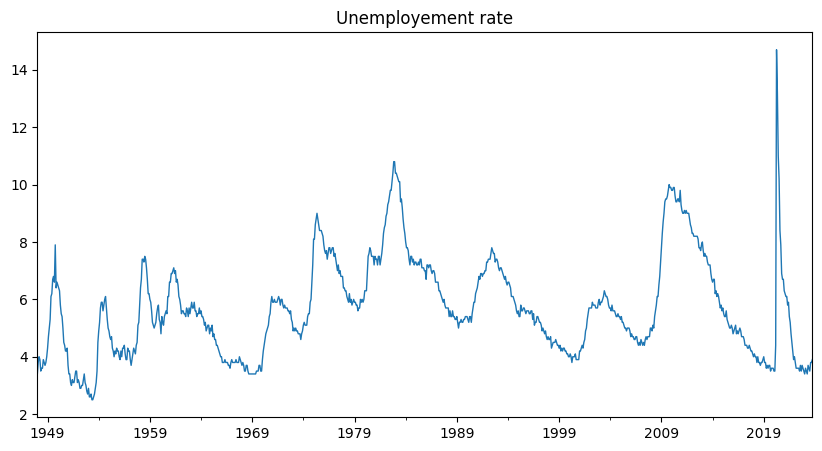

In [7]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize = (10,5), title = 'Unemployement rate', lw =1)
fig1 = px.line(unrate)
fig1.show()

In [8]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment	== "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
print(unemp_df.shape)
unemp_df.head(5)

(62, 15)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-11-22,2023-11-22,Unemployment Rate in California,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:01-06:00,62,None
NYUR,NYUR,2023-11-22,2023-11-22,Unemployment Rate in New York,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:02-06:00,53,None
TXUR,TXUR,2023-11-22,2023-11-22,Unemployment Rate in Texas,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:18:03-06:00,53,None
FLUR,FLUR,2023-11-22,2023-11-22,Unemployment Rate in Florida,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:03-06:00,49,None
MIUR,MIUR,2023-11-22,2023-11-22,Unemployment Rate in Michigan,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:04-06:00,38,None


In [9]:
all_result = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name = myid)
  all_result.append(results)



In [10]:
type(all_result)

list

In [11]:
unemp_results = pd.concat(all_result, axis = 1)
unemp_states = unemp_results
unemp_states  =unemp_results.drop(['LASMT261982000000003','LASMT391746000000003'], axis = 1) # dropping columns
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c]for c in unemp_states.columns]

unemp_states


,California,New York,Texas,Florida,Michigan,Ohio,Alabama,Colorado,Pennsylvania,North Carolina,...,Midwest Census Region,Delaware,Vermont,Northeast Census Region,South Census Region,New England Census Division,West North Central Census Division,FRB-St. Louis District States (DISCONTINUED),Great Lakes BEA Region (DISCONTINUED),Mountain Census Division
1976-01-01,9.2,10.3,5.8,9.7,9.9,8.1,6.6,5.8,8.0,6.4,...,6.8,8.0,8.6,9.6,6.9,9.6,5.0,6.308,NaN,7.2
1976-02-01,9.2,10.3,5.8,9.7,9.9,8.1,6.6,5.7,8.1,6.4,...,6.8,8.0,8.6,9.6,6.9,9.6,5.0,6.180,NaN,7.2
1976-03-01,9.1,10.2,5.9,9.6,9.9,8.1,6.6,5.7,8.1,6.4,...,6.8,8.0,8.6,9.6,6.9,9.6,5.0,6.187,NaN,7.2
1976-04-01,9.1,10.2,5.9,9.5,9.8,8.0,6.5,5.6,8.1,6.3,...,6.7,8.1,8.6,9.5,6.8,9.4,4.9,6.129,NaN,7.1
1976-05-01,9.0,10.1,5.9,9.3,9.6,7.8,6.4,5.6,8.1,6.1,...,6.6,8.3,8.5,9.5,6.7,9.3,4.9,6.134,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,3.9,4.1,2.6,3.6,3.4,2.2,2.8,3.8,3.3,...,3.2,4.2,1.9,3.5,3.2,2.8,2.7,NaN,NaN,3.3
2023-07-01,4.6,3.9,4.1,2.7,3.6,3.3,2.1,2.9,3.5,3.3,...,3.2,4.1,1.8,3.5,3.2,2.7,2.7,NaN,NaN,3.4
2023-08-01,4.6,3.9,4.1,2.7,3.7,3.4,2.1,3.1,3.5,3.3,...,3.3,4.1,1.8,3.5,3.2,2.7,2.8,NaN,NaN,3.5
2023-09-01,4.7,4.0,4.1,2.8,3.9,3.4,2.2,3.2,3.4,3.4,...,3.4,4.1,1.9,3.6,3.2,2.7,2.8,NaN,NaN,3.6


In [12]:
unemp_states.columns

Index(['California', 'New York', 'Texas', 'Florida', 'Michigan', 'Ohio',
       'Alabama', 'Colorado', 'Pennsylvania', 'North Carolina', 'Illinois',
       'Massachusetts', 'Minnesota', 'Kentucky', 'Georgia', 'Virginia',
       'Wisconsin', 'Arizona', 'New Jersey', 'New Mexico', 'Maryland',
       'Washington', 'Iowa', 'Alaska', 'Oregon', 'South Carolina', 'Tennessee',
       'West Virginia', 'Utah', 'Louisiana', 'Indiana', 'Missouri', 'Hawaii',
       'Nevada', 'Oklahoma', 'Arkansas', 'North Dakota', 'Puerto Rico',
       'Montana', 'Connecticut', 'the District of Columbia', 'Idaho',
       'Mississippi', 'Wyoming', 'Kansas', 'New Hampshire', 'Nebraska',
       'Maine', 'Rhode Island', 'South Dakota', 'Midwest Census Region',
       'Delaware', 'Vermont', 'Northeast Census Region', 'South Census Region',
       'New England Census Division', 'West North Central Census Division',
       'FRB-St. Louis District States (DISCONTINUED)',
       'Great Lakes BEA Region (DISCONTINUED)', 'Mou

In [13]:
unemp_states.isna().sum(axis = 1)


1976-01-01    1
1976-02-01    1
1976-03-01    1
1976-04-01    1
1976-05-01    1
             ..
2023-06-01    2
2023-07-01    2
2023-08-01    2
2023-09-01    2
2023-10-01    2
Freq: MS, Length: 574, dtype: int64

1976-01-01    1
1976-02-01    1
1976-03-01    1
1976-04-01    1
1976-05-01    1
             ..
2023-06-01    2
2023-07-01    2
2023-08-01    2
2023-09-01    2
2023-10-01    2
Freq: MS, Length: 574, dtype: int64


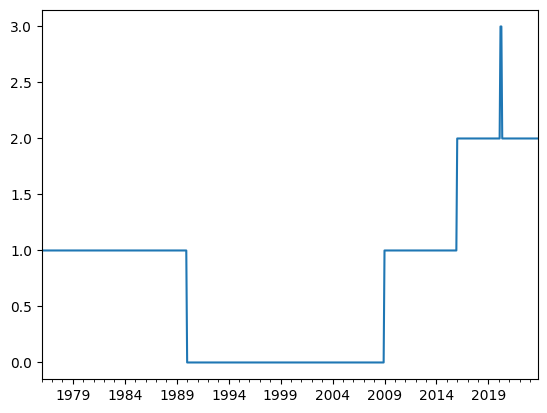

In [14]:
unemp_states.isna().sum(axis = 1).plot()
print(unemp_states.isna().sum(axis =1))

(574, 57)


,1976-01-01,1976-02-01,1976-03-01,1976-04-01,1976-05-01
California,9.2,9.2,9.1,9.1,9.0
New York,10.3,10.3,10.2,10.2,10.1
Texas,5.8,5.8,5.9,5.9,5.9
Florida,9.7,9.7,9.6,9.5,9.3
Michigan,9.9,9.9,9.9,9.8,9.6
Ohio,8.1,8.1,8.1,8.0,7.8
Alabama,6.6,6.6,6.6,6.5,6.4
Colorado,5.8,5.7,5.7,5.6,5.6
Pennsylvania,8.0,8.1,8.1,8.1,8.1
North Carolina,6.4,6.4,6.4,6.3,6.1


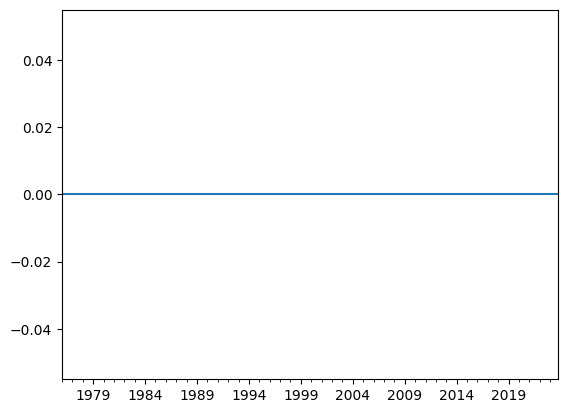

In [15]:
unemp_states = unemp_states.dropna(axis =1)
print(unemp_states.shape)
unemp_states.isna().sum(axis = 1).plot()
unemp_states.head(5).T

In [16]:
fig = px.line(unemp_states)

fig.show()

In [17]:
fig.update_xaxes(range=["2018-01-01", "2023-11-01"])
fig.show()

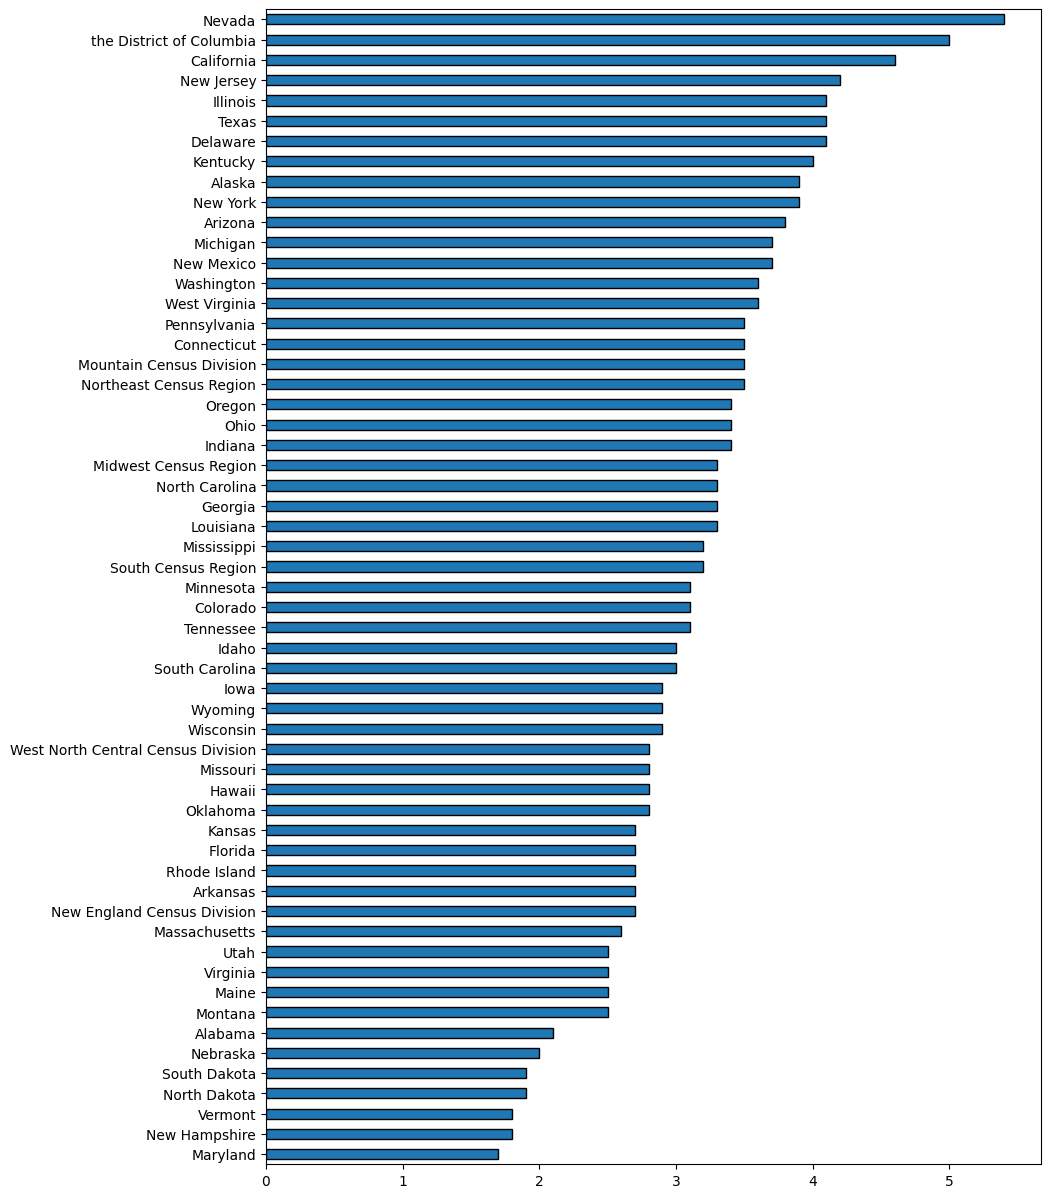

In [18]:
ax = unemp_states.loc[unemp_states.index == '2023-08-01'].T\
.sort_values('2023-08-01')\
.plot(kind = 'barh', figsize = (10,15), edgecolor ='black')

ax.legend().remove()
plt.show()


Pulling specific date employment rate per state

In [19]:
unemp_date = unemp_states.loc[unemp_states.index == '2023-09-01'].T.sort_values(by = '2023-09-01')
fig2 = px.bar(unemp_date, x = '2023-09-01', y= unemp_date.index, title = 'enemployment rate by states', \
              labels = {'x':'employment rate','y':'states'})
fig2.update_xaxes(title_text = 'employment rate')
fig2.update_yaxes(title_text = 'States')
fig2.show()

Pull Labor Force Participation  Rate

In [20]:
part_df = fred.search('Labor Force Participation state',order_by='popularity', filter= (('frequency','Monthly')) )
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]
part_df.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA26,LBSSA26,2023-11-22,2023-11-22,Labor Force Participation Rate for Michigan,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:02-06:00,22,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2023-11-22,2023-11-22,Labor Force Participation Rate for Florida,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:04-06:00,21,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2023-11-22,2023-11-22,Labor Force Participation Rate for Kentucky,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:02-06:00,19,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2023-11-22,2023-11-22,Labor Force Participation Rate for Mississippi,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:06-06:00,19,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2023-11-22,2023-11-22,Labor Force Participation Rate for Minnesota,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:05-06:00,18,A state's labor-force participation rate is th...


In [21]:
state_id = part_df['title'].str.replace('Labor Force Participation Rate for ','')
print(state_id)
state_id = state_id.to_dict()
print(state_id)
all_results = []

print(fred.get_series('LBSSA21').to_frame(name = 'myid'))

for myid in part_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name = myid)
  all_results.append(results)

part_states = pd.concat(all_results, axis = 1)






series id
LBSSA26                Michigan
LBSSA12                 Florida
LBSSA21                Kentucky
LBSSA28             Mississippi
LBSSA27               Minnesota
LBSSA55               Wisconsin
LBSSA36                New York
LBSSA51                Virginia
LBSSA42            Pennsylvania
LBSSA47               Tennessee
LBSSA13                 Georgia
LBSSA35              New Mexico
LBSSA54           West Virginia
LBSSA23                   Maine
LBSSA19                    Iowa
LBSSA06              California
LBSSA25           Massachusetts
LBSSA49                    Utah
LBSSA24                Maryland
LBSSA17                Illinois
LBSSA37          North Carolina
LBSSA48                   Texas
LBSSA09             Connecticut
LBSSA01                 Alabama
LBSSA41                  Oregon
LBSSA39                    Ohio
LBSSA04                 Arizona
LBSSA22               Louisiana
LBSSA02                  Alaska
LBSSA31                Nebraska
LBSSA34              New Jerse

In [22]:
print(part_states.columns)
print([state_id [c] for c in part_states.columns])
part_states.columns = [state_id [c] for c in part_states.columns]

Index(['LBSSA26', 'LBSSA12', 'LBSSA21', 'LBSSA28', 'LBSSA27', 'LBSSA55',
       'LBSSA36', 'LBSSA51', 'LBSSA42', 'LBSSA47', 'LBSSA13', 'LBSSA35',
       'LBSSA54', 'LBSSA23', 'LBSSA19', 'LBSSA06', 'LBSSA25', 'LBSSA49',
       'LBSSA24', 'LBSSA17', 'LBSSA37', 'LBSSA48', 'LBSSA09', 'LBSSA01',
       'LBSSA41', 'LBSSA39', 'LBSSA04', 'LBSSA22', 'LBSSA02', 'LBSSA31',
       'LBSSA34', 'LBSSA08', 'LBSSA18', 'LBSSA45', 'LBSSA29', 'LBSSA16',
       'LBSSA33', 'LBSSA40', 'LBSSA38', 'LBSSA20', 'LBSSA46', 'LBSSA32',
       'LBSSA30', 'LBSSA53', 'LBSSA50', 'LBSSA15', 'LBSSA56', 'LBSSA05',
       'LBSSA10', 'LBSSA11', 'LBSSA44'],
      dtype='object')
['Michigan', 'Florida', 'Kentucky', 'Mississippi', 'Minnesota', 'Wisconsin', 'New York', 'Virginia', 'Pennsylvania', 'Tennessee', 'Georgia', 'New Mexico', 'West Virginia', 'Maine', 'Iowa', 'California', 'Massachusetts', 'Utah', 'Maryland', 'Illinois', 'North Carolina', 'Texas', 'Connecticut', 'Alabama', 'Oregon', 'Ohio', 'Arizona', 'Louisiana', 'Alask

In [23]:
part_states.head(5)


,Michigan,Florida,Kentucky,Mississippi,Minnesota,Wisconsin,New York,Virginia,Pennsylvania,Tennessee,...,Nevada,Montana,Washington,Vermont,Hawaii,Wyoming,Arkansas,Delaware,District Of Columbia,Rhode Island
1976-01-01,61.6,55.8,60.5,58.8,65.6,65.6,58.0,65.9,58.4,59.6,...,71.3,62.7,60.9,63.6,69.9,65.3,57.9,62.7,64.4,63.8
1976-02-01,61.5,55.7,60.3,58.6,65.5,65.5,58.0,65.8,58.3,59.4,...,70.8,62.5,60.7,63.4,69.6,64.9,57.8,62.5,64.5,63.7
1976-03-01,61.5,55.5,60.2,58.5,65.4,65.4,58.0,65.6,58.3,59.3,...,70.5,62.4,60.6,63.2,69.6,64.7,57.7,62.5,64.5,63.6
1976-04-01,61.6,55.5,60.1,58.5,65.4,65.4,58.0,65.5,58.3,59.3,...,70.4,62.3,60.6,63.5,69.4,64.9,57.7,62.4,64.5,63.7
1976-05-01,61.7,55.4,60.1,58.5,65.5,65.5,58.1,65.4,58.3,59.4,...,70.5,62.2,60.7,63.6,69.3,65.2,57.7,62.4,64.4,63.6


Unemployment vs Participation

Text(0.5, 1.0, 'Texas')

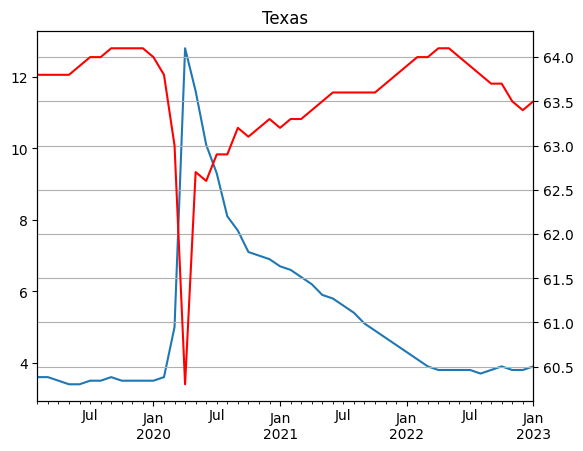

In [24]:
fig, ax= plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index>2019 and index <= 2023')['Texas'].plot(ax = ax)
part_states.query('index>2019 and index <= 2023')['Texas'].plot(ax = ax2,label ='Participation', color = 'red')
ax2.grid(True)
ax.set_title('Texas')

IndexError: ignored

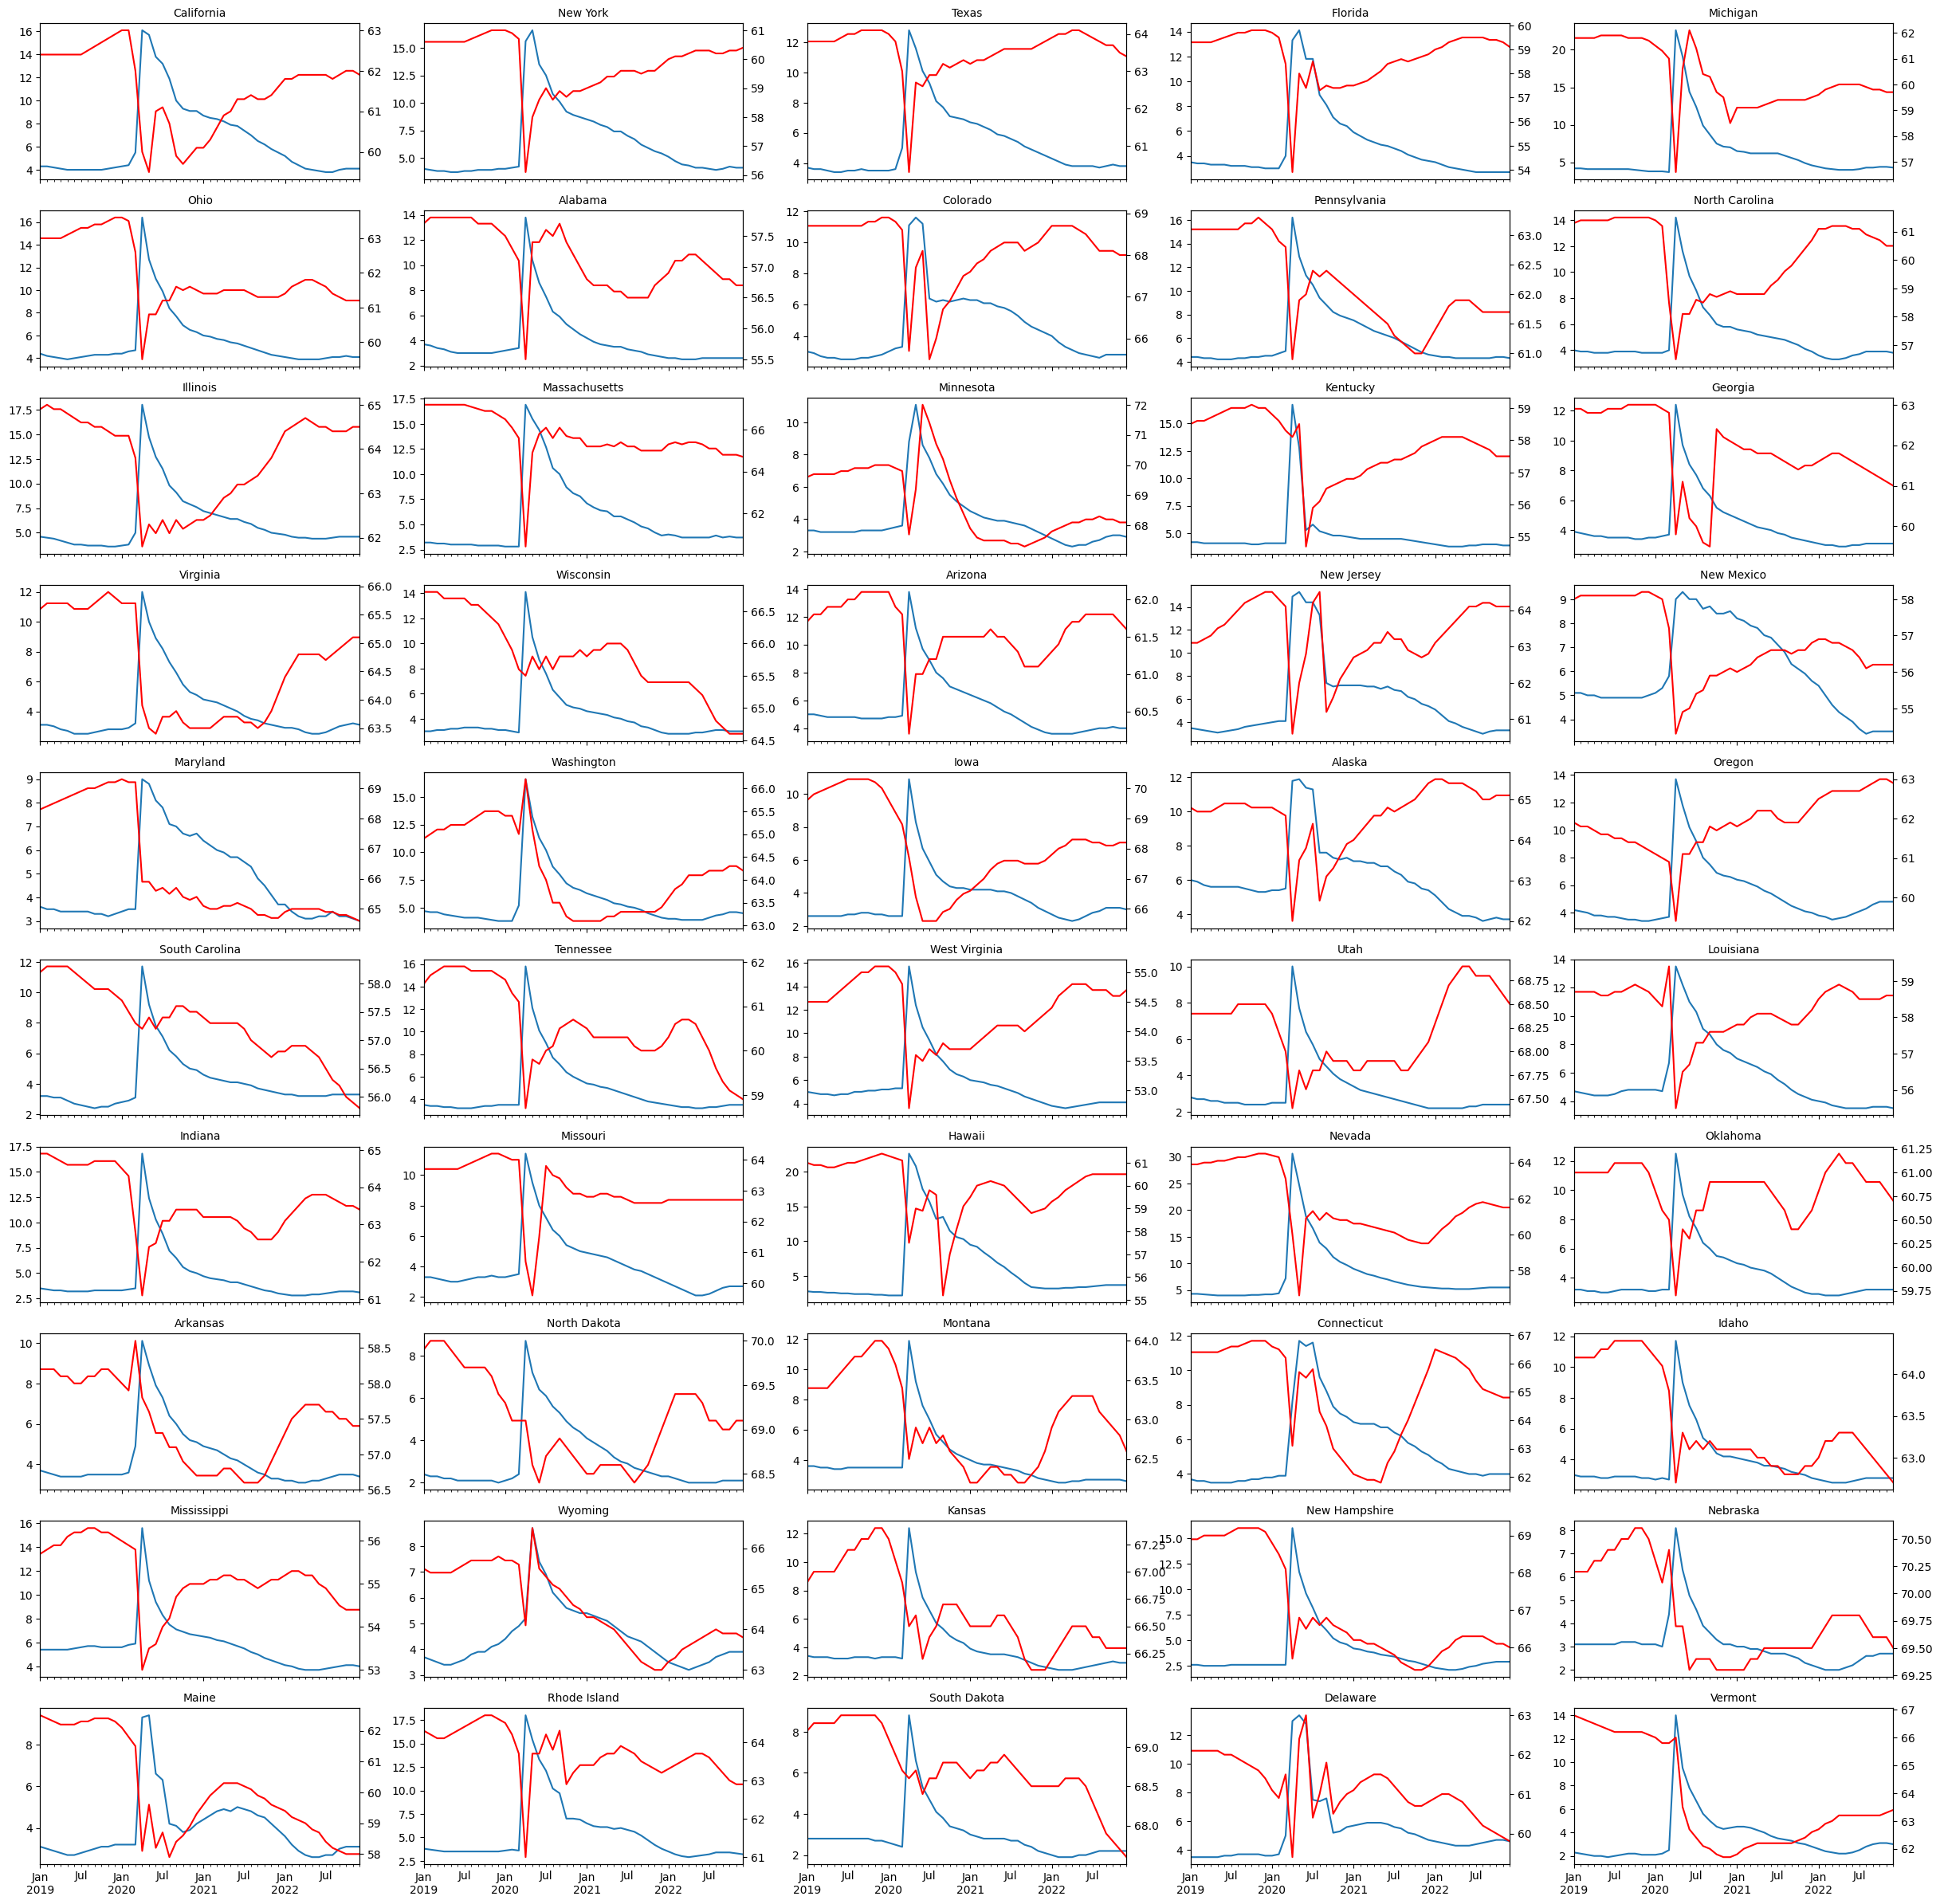

In [25]:
fig, axs= plt.subplots(10,5,figsize = (30,30), sharex=True)
axs = axs.flatten()


i=0
for state in unemp_states.columns:
  if state == "the District of Columbia" or state == 'Midwest Census Region':
    continue
  ax2= axs[i].twinx()
  unemp_states.query('index>=2019 and index<2023')[state]\
  .plot(ax=axs[i],label = 'Unemployement')
  part_states.query('index>=2019 and index<2023')[state]\
  .plot(ax=ax2,label ='Participation', color = 'red')
  ax2.grid(False)
  axs[i].set_title(state,fontsize =  10)
  i+=1
plt.tight_layout()
plt.show()





